# problem statement: Traffic-sign recognition 
- collection of traffic signal taken under different scene - input
- seperate set of images for testing
- classify the signs 

In [1]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import cv2
import tensorflow as tf
from PIL import Image 
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# step 2: fetch the path for the images 

In [2]:
data=[]
labels=[]
classes=43
dataset_dir='datasets/'
metadf=pd.read_csv('datasets/Meta.csv')
traindf=pd.read_csv('datasets/Train.csv')
testdf=pd.read_csv('datasets/Test.csv')

labels=['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for tracks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for track', 'Brock',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for track']
print('shape of training set:', traindf.shape)
print('shape of test set:', testdf.shape)
print('shape of MataInfo:', metadf.shape)

shape of training set: (39209, 8)
shape of test set: (12630, 8)
shape of MataInfo: (43, 5)


# step 3: load the path

In [55]:
# traindf['path']= list(map)
# print(set(traindf['ClassId']))

# step 4: analyze the class distribution using Histogram

<Axes: title={'center': 'train class distribution'}, xlabel='ClassId', ylabel='count'>

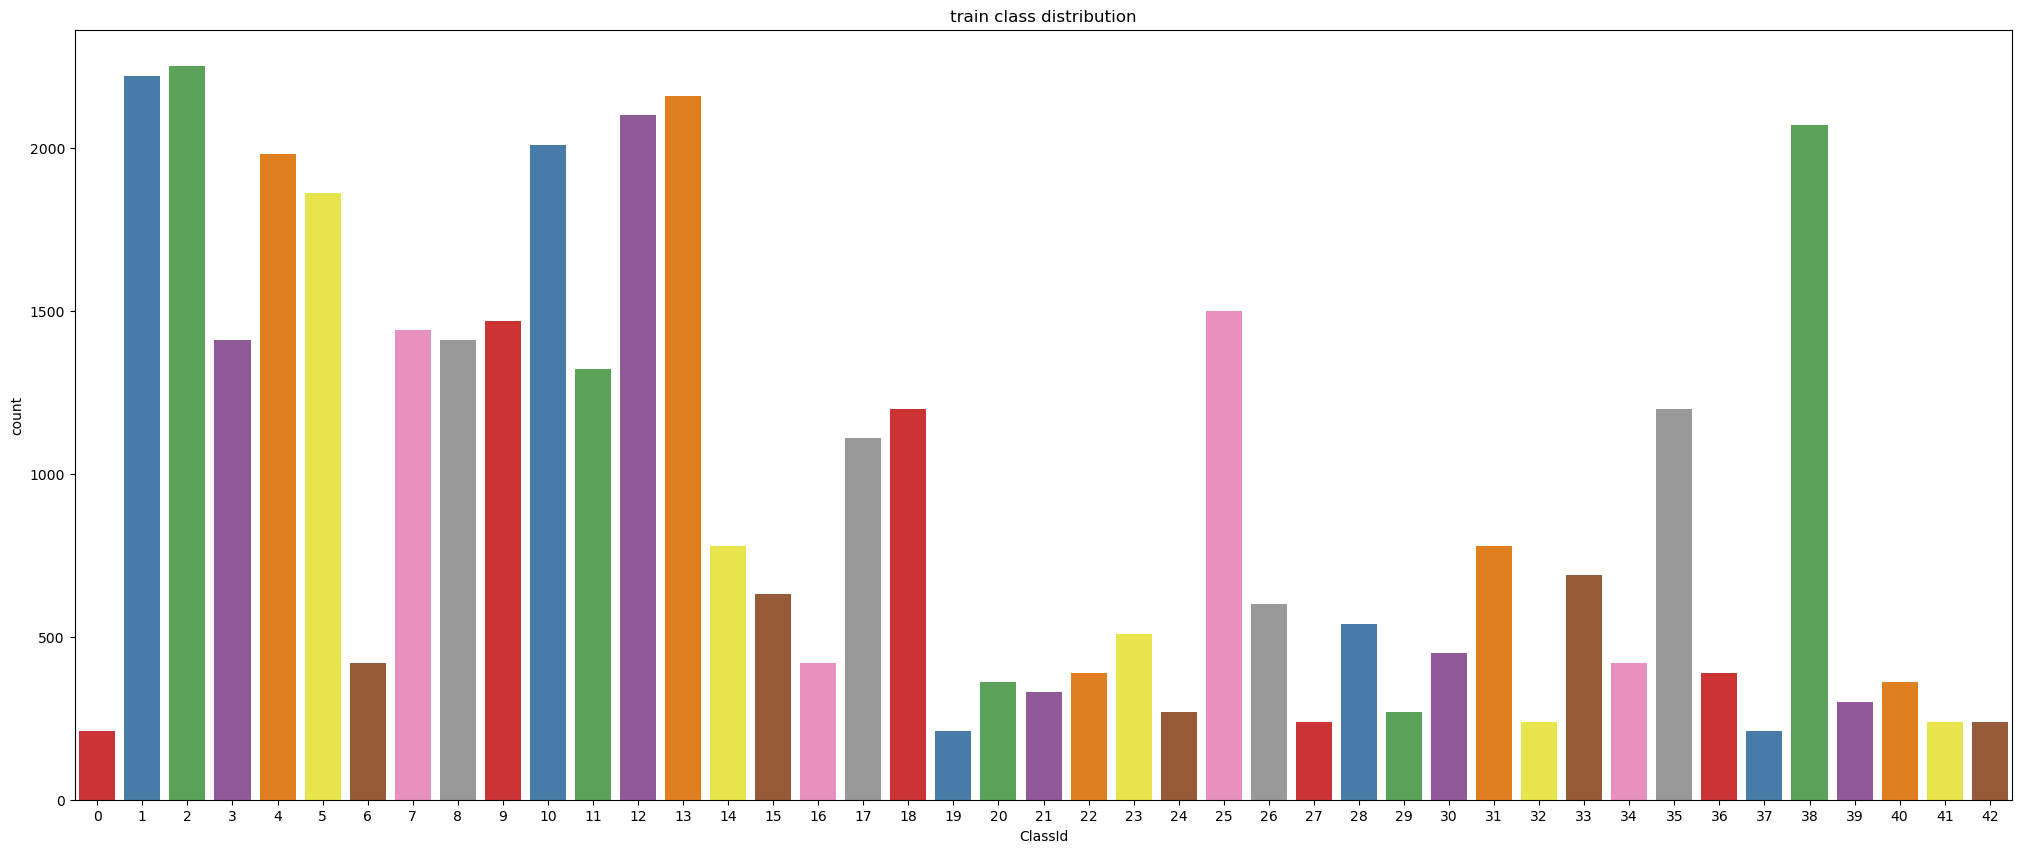

In [3]:
fig, axs = plt.subplots( figsize=(25,10))
plt.title('train class distribution')
sns.countplot(traindf,x='ClassId', palette='Set1')


<Axes: title={'center': 'test class distribution'}, xlabel='ClassId', ylabel='count'>

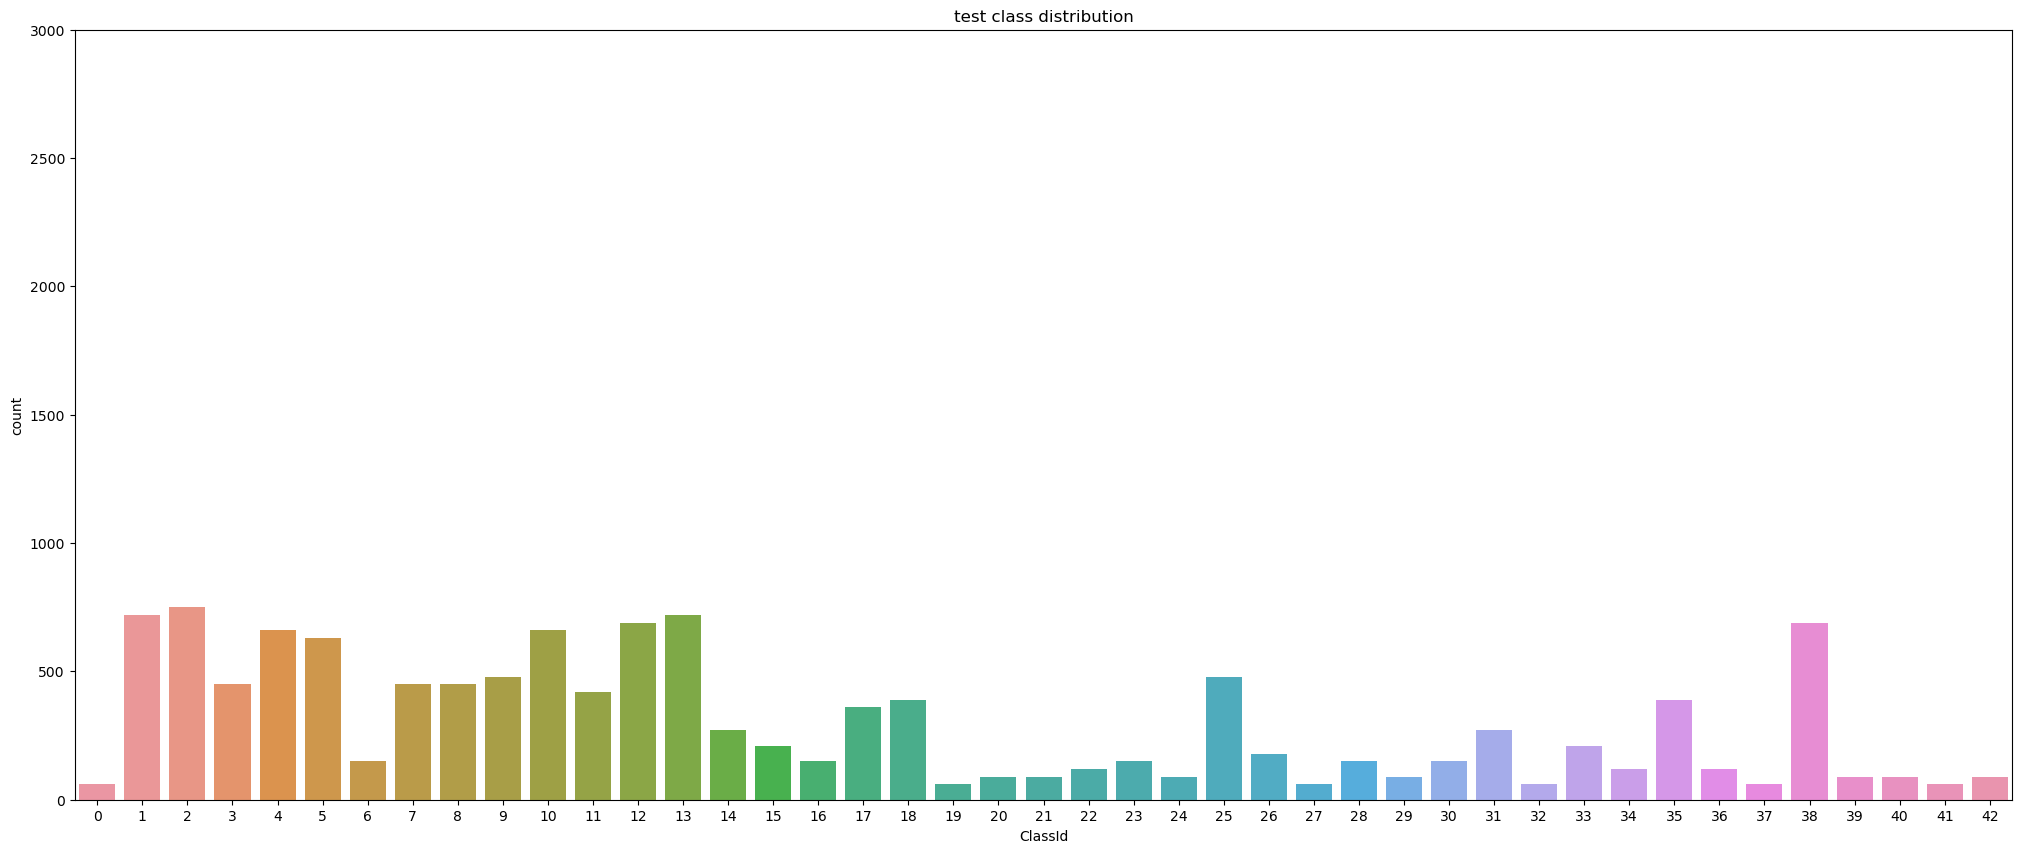

In [4]:
fig, axs = plt.subplots( figsize=(25,10))
plt.ylim(0,3000)
plt.title('test class distribution')
sns.countplot(testdf,x='ClassId')


# step 6 Analyze the size distribution of images 
- accuracy dependent on the quality of the images
- Kernel Density estimate - used for probability density funtion of a continous variable
- multivariate plotting - since the images are not of same resolution
  

E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda3\envs\tf\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with

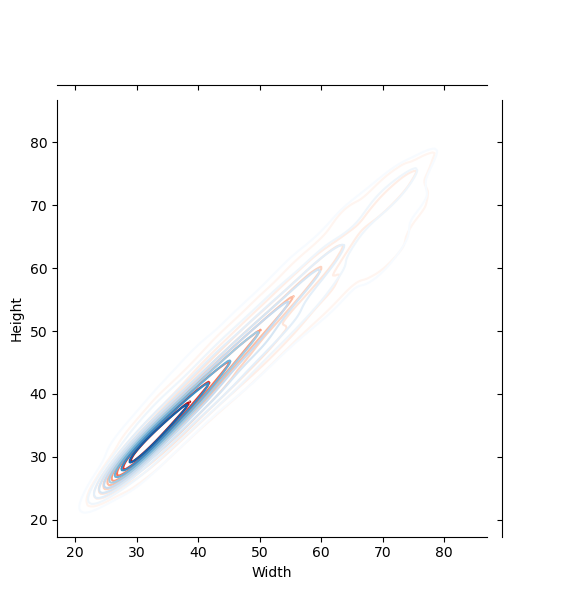

In [5]:
traindfdpi=traindf[(traindf['Width']<80) & (traindf['Height']<80)]
testdfdpi=testdf[(testdf['Width']<80) & (testdf['Height']<80)]

g=sns.JointGrid(x='Width',y='Height', data=traindfdpi)
sns.kdeplot(x=traindfdpi['Width'],y=traindfdpi['Height'],cmap='Reds', ax=g.ax_joint)
sns.kdeplot(x=testdfdpi['Width'],y=testdfdpi['Height'],cmap='Blues',ax=g.ax_joint)

plt.show()

# Visualize the target class

TypeError: 'NoneType' object is not subscriptable

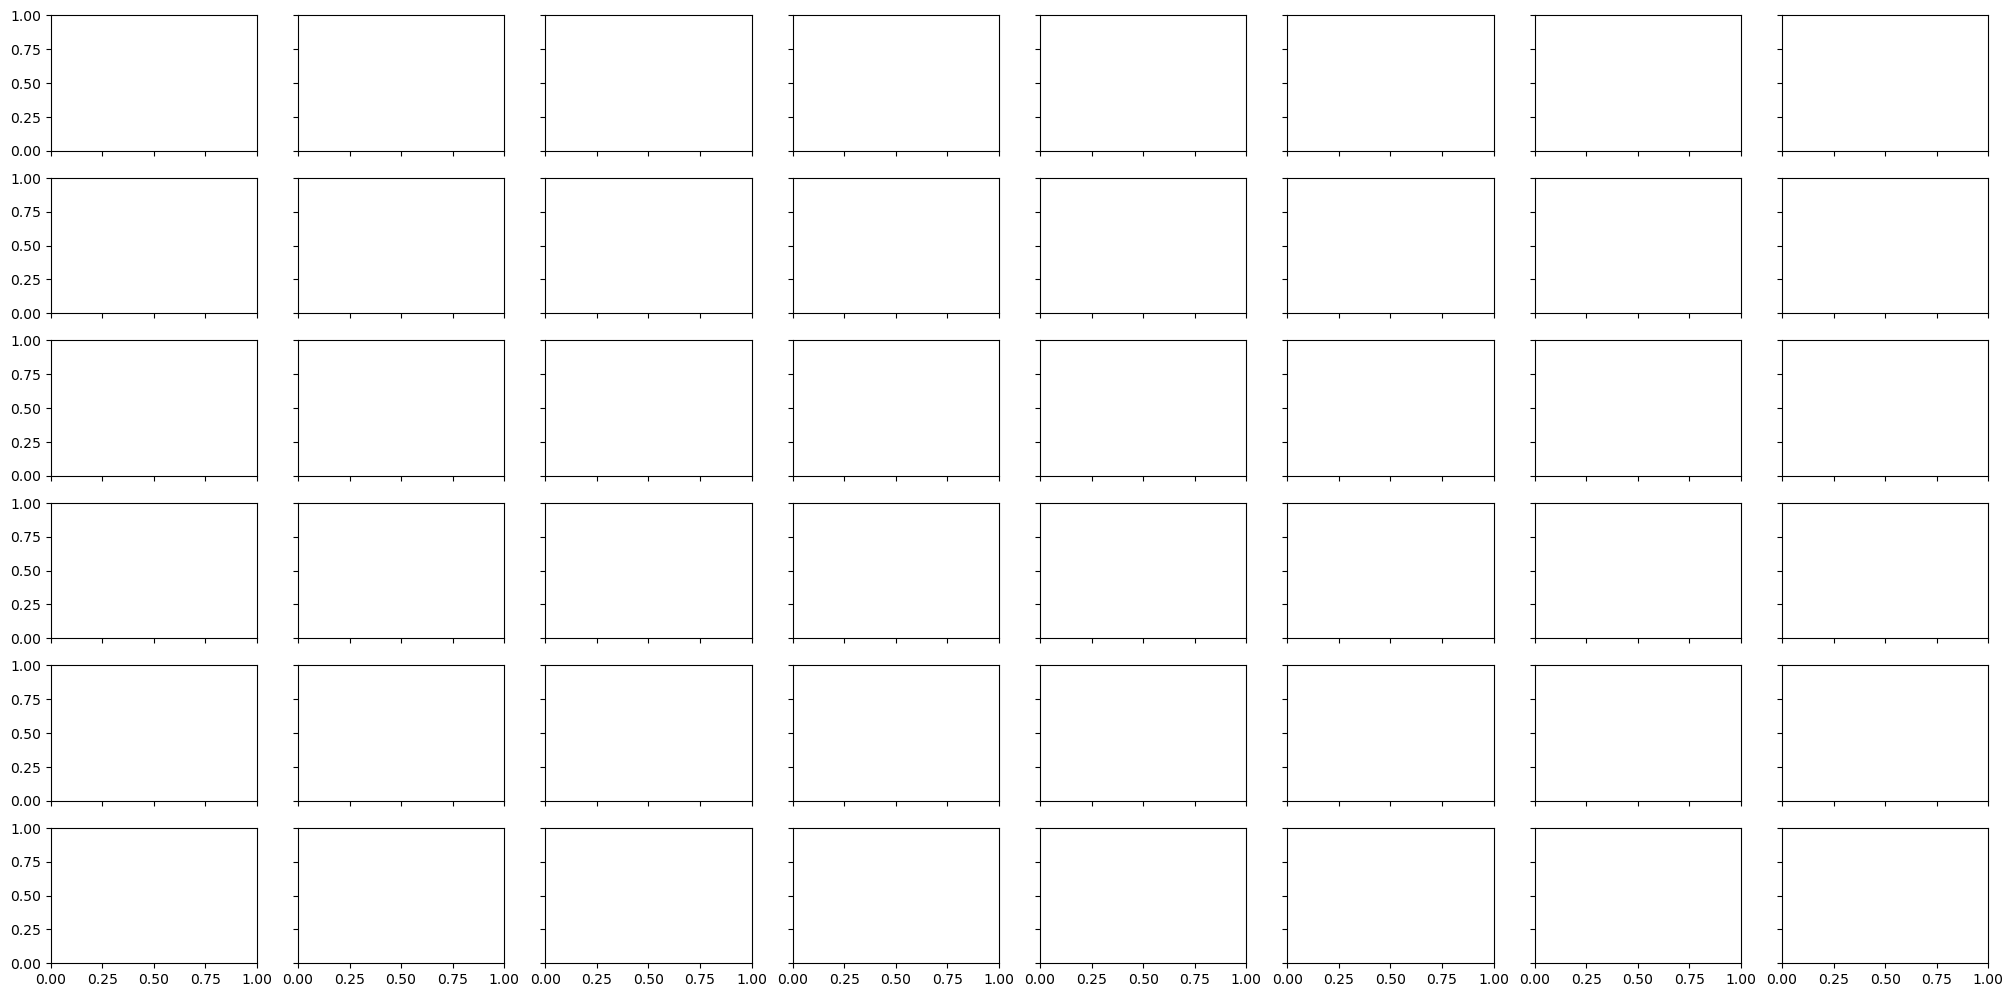

In [7]:
sns.set_style()
rows = 6
cols = 8
traindf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), traindf['Path']))
testdf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), testdf['Path']))
metadf['Path'] = list(map(lambda x: os.path.join(dataset_dir,x.lower()), metadf['Path']))


fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
metadf = metadf.sort_values(by=['ClassId'])
idx = 0
for i in range(rows):
    for j in range(cols):
        if idx > 42:
            break
            
        img = cv2.imread(metadf["Path"].tolist()[idx], cv2.IMREAD_UNCHANGED)
        img[np.where(img[:,:,3]==0)] = [255,255,255,255]
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        
        axs[i,j].imshow(img)
        axs[i,j].set_facecolor('xkcd:salmon')
        axs[i,j].set_facecolor((1.0, 0.47, 0.42))
        axs[i,j].set_title(labels[int(metadf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1

datasets/


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


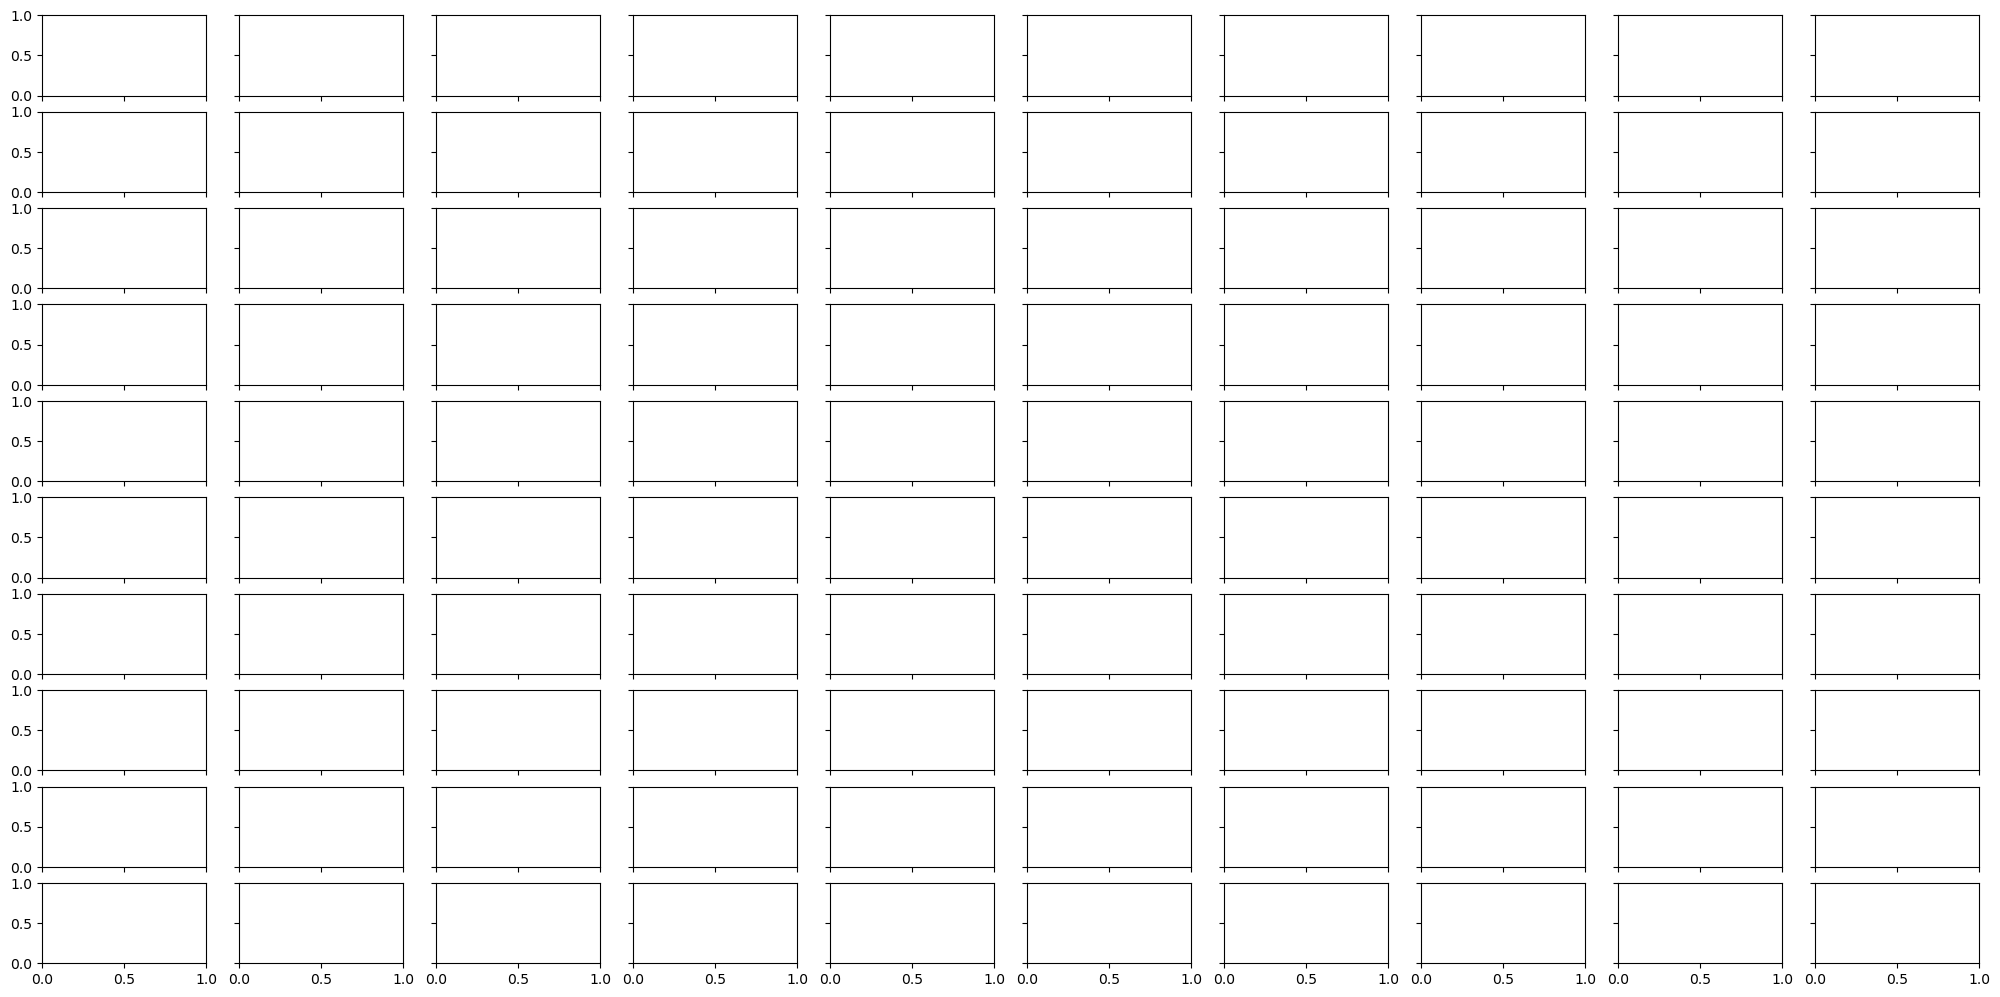

In [8]:
rows = 10
cols = 10
fig, axs = plt.subplots(rows, cols, sharex=True, sharey=True, figsize=(25, 12))
plt.subplots_adjust(left=None, bottom=None, right=None, top=0.9, wspace=None, hspace=None)
cur_path = dataset_dir
print(cur_path)
idx = 0
for i in range(rows):
    for j in range(cols):
        path = os.path.join(cur_path,traindf["Path"].tolist()[idx]) 
        img = cv2.imread(path,cv2.IMREAD_UNCHANGED)
        #print(path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (60,60))
        axs[i,j].imshow(img)
        axs[i,j].set_title(labels[int(traindf["ClassId"].tolist()[idx])])
        axs[i,j].get_xaxis().set_visible(False)
        axs[i,j].get_yaxis().set_visible(False)
        idx += 1